In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 4 (Fixed Set Test).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,403,3049,11,59,32,8,58,7,69,...,18,20,0,32,0,8,98.4,53.3,109,Train
2008-01-02,411032,357,3211,0,51,0,0,46,6,61,...,10,19,5,39,7,5,90.8,53.0,108,Train
2008-01-03,414332,344,3153,0,57,7,24,58,6,61,...,38,28,6,30,0,0,89.5,53.4,106,Train
2008-01-04,395900,338,3184,0,51,6,9,58,6,66,...,25,22,8,45,0,8,82.6,56.4,106,Train
2008-01-05,366387,369,2964,0,57,0,7,57,6,63,...,16,22,5,47,0,9,79.8,57.2,106,Train


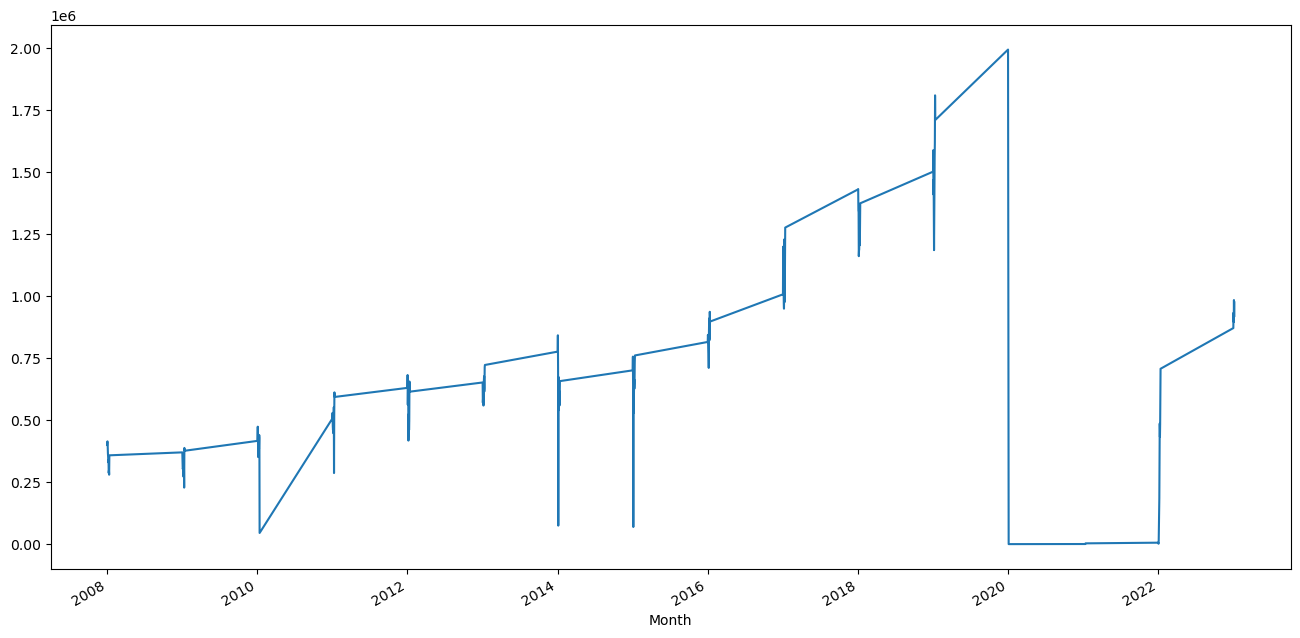

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [4]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  Number of Posts  Number of Comments  \
Month                                                              
2008-01-01           399556              403                3049   
2008-01-02           411032              357                3211   
2008-01-03           414332              344                3153   
2008-01-04           395900              338                3184   
2008-01-05           366387              369                2964   
...                     ...              ...                 ...   
2023-01-02           932969              481                3576   
2023-01-03           895425              543                4058   
2023-01-04           984146              422                3135   
2023-01-05           916257              347                2609   
2023-01-06           975010              328                2339   

            Airbnb Vietnam  Vietnam restaurant  Shopping in Hanoi  \
Month                                         

In [5]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5062.559, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5058.682, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5059.447, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5059.222, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5056.726, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5057.622, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5057.310, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5058.795, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5060.456, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5060.497, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5062.493, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.452 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [6]:
train = df1['Tourist Arrival'][:'01/01/2021'].dropna()
test = df1['Tourist Arrival']['01/04/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/01/2021'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/04/2019':].dropna()

In [7]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(0,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49851D+01    |proj g|=  6.30780D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25      0      1      0     0     0   6.308D-07   1.499D+01
  F =   14.985082365222784     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Tourist Arrival   No. Observations:                  157
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2352.658
Date:                Wed, 23 Aug 2023   AIC                           4755.316
Time:                        21:38:47   BIC                           4831.401
Sample:                             0   HQIC                          4786.220
                                - 157                                         
Covariance Type:                  opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Number of Posts            87.2739    4.8e+04      0.002      0.999   -9.39e+04    9.41e+04
Number of Comments         38.7384   5307.793      0.007      0.994   -1.04e+04    1.04e+04
Airbnb Vietnam           -912.2877    2.9e+05     -0.003      0.997   -5.69e+05    5.67e+05
Vietnam restaurant       2880.3883   3.96e+05      0.007      0.994   -7.74e+05     7.8e+05
Shopping in Hanoi         472.0011   4.25e+05      0.001      0.999   -8.32e+05    8.33e+05
Shopping in Ho Chi Minh   913.6957   4.39e+05      0.002      0.998   -8.59e+05    8.61e+05
 Vietnam tour            2289.1507    6.9e+05      0.003      0.997   -1.35e+06    1.35e+06
 Skyscanner              6998.9509   4.96e+05      0.014      0.989   -9.65e+05    9.79e+05
 Vietnam visa            4341.4968   5.07e+05      0.009      0.993    -9.9e+05    9.99e+05
 Vietnam airport        -1866.9228   5.89e+05     -0.003      0.997   -1.16e+06    1.15e+06
 Vietnam flights        -1602.7453   5.43e+05     -0.003      0.998   -1.07e+06    1.06e+06
 Danang airport           576.9993   2.32e+05      0.002      0.998   -4.55e+05    4.56e+05
 Hoi An                 -1674.3459   2.83e+05     -0.006      0.995   -5.56e+05    5.53e+05
 Vietnam weather         -317.5896   2.88e+05     -0.001      0.999   -5.65e+05    5.65e+05
 Visa for Vietnam        1563.8995   7.08e+05      0.002      0.998   -1.39e+06    1.39e+06
 Sgn airport             1921.6182   3.48e+05      0.006      0.996   -6.79e+05    6.83e+05
 Phu Quoc                3085.7115   2.56e+05      0.012      0.990   -4.98e+05    5.04e+05
 Vietnam itinerary      -1981.2606   3.97e+05     -0.005      0.996   -7.81e+05    7.77e+05
 Vietnam trip            4000.7062   3.44e+05      0.012      0.991    -6.7e+05    6.78e+05
 Things to do in Hue     3667.5316   4.88e+05      0.008      0.994   -9.54e+05    9.61e+05
 Vietnam backpackers    -5354.4986   4.89e+05     -0.011      0.991   -9.63e+05    9.52e+05
CCI                     -3389.7563   6.54e+05     -0.005      0.996   -1.29e+06    1.28e+06
PMI                     -6265.0195   8.86e+05     -0.007      0.994   -1.74e+06    1.73e+06
REERI                   -5875.7951   1.57e+06     -0.004      0.997   -3.08e+06    3.07e+06
sigma2                   2.415e+12      0.029   8.26e+13      0.000    2.41e+12    2.41e+12
===================================================================================
Ljung-Box (L1) (Q):                  15.36   Jarque-Bera (JB):               141.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.04
Prob(H) (two-sided):                  0.52   Kurtosis:                         7.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with conditi

In [8]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [10]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 390044.0581046664


In [11]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 311702.8717842374


In [12]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 3.292080022744082e+20


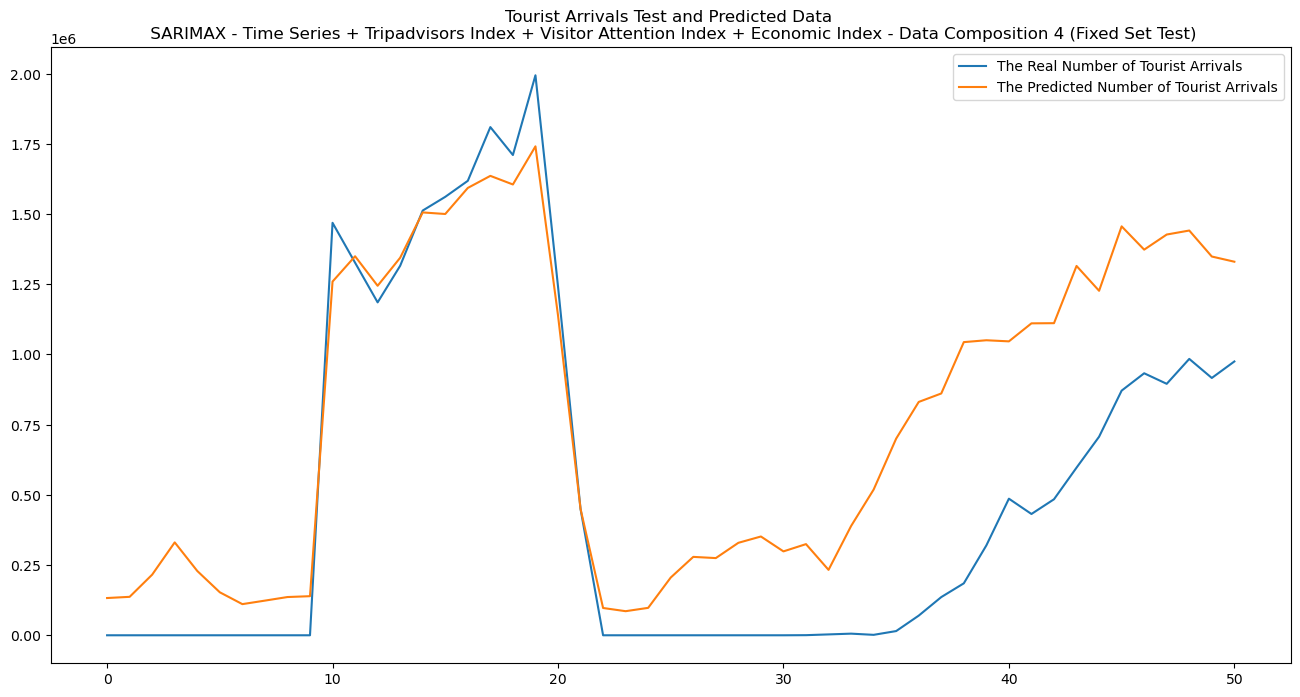

In [13]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Tripadvisors Index + Visitor Attention Index + Economic Index - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()